<a href="https://colab.research.google.com/github/corderobot/Kaggle_HousePrices/blob/master/NNs/HousePrices_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset
Dataset fue previamente procesado utilizando R. El dataset set limpio está subido a git en un archivo .csv llamado "clean.csv".
Dicho archivo es utilizado para entrenar/probar las redes neuronales

## Extracting

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/train.csv')

## Getting to know the New Dataset

In [560]:
dataset.columns
#dataset.drop(dataset.columns[0])
target = dataset['SalePrice']
dataset = dataset.drop(columns=['Id', 'SalePrice'])
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1458,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0

## Encoding


### Integer Encoding

In [561]:
toIntegerEncode = ['Street', 'LotShape', 'Utilities', 'LandSlope',
                   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                   'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PavedDrive', 'PoolQC', 'Fence'
                   ]

dataset[toIntegerEncode[0]] = dataset[toIntegerEncode[0]].map({'Grvl': 0, 'Pave': 1})
dataset[toIntegerEncode[1]] = dataset[toIntegerEncode[1]].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 0})
dataset[toIntegerEncode[2]] = dataset[toIntegerEncode[2]].map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 0})
dataset[toIntegerEncode[3]] = dataset[toIntegerEncode[3]].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
dataset[toIntegerEncode[4]] = dataset[toIntegerEncode[4]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
dataset[toIntegerEncode[5]] = dataset[toIntegerEncode[5]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
dataset[toIntegerEncode[6]] = dataset[toIntegerEncode[6]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
dataset[toIntegerEncode[7]] = dataset[toIntegerEncode[7]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
dataset[toIntegerEncode[8]] = dataset[toIntegerEncode[8]].map({float('NaN'): 0, 'No': 1,'Mn': 2, 'Av': 3, 'Gd': 4})
dataset[toIntegerEncode[9]] = dataset[toIntegerEncode[9]].map({float('NaN'): 0, 'Unf': 1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
dataset[toIntegerEncode[10]] = dataset[toIntegerEncode[10]].map({float('NaN'): 0, 'Unf': 1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
dataset[toIntegerEncode[11]] = dataset[toIntegerEncode[11]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
dataset[toIntegerEncode[12]] = dataset[toIntegerEncode[12]].map({'N': 0, 'Y': 1})
dataset[toIntegerEncode[13]] = dataset[toIntegerEncode[13]].map({float('NaN'): 0, 'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5})
dataset[toIntegerEncode[14]] = dataset[toIntegerEncode[14]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
dataset[toIntegerEncode[15]] = dataset[toIntegerEncode[15]].map({float('NaN'): 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})
dataset[toIntegerEncode[16]] = dataset[toIntegerEncode[16]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
dataset[toIntegerEncode[17]] = dataset[toIntegerEncode[17]].map({float('NaN'): 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
dataset[toIntegerEncode[18]] = dataset[toIntegerEncode[18]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
dataset[toIntegerEncode[19]] = dataset[toIntegerEncode[19]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
dataset[toIntegerEncode[20]] = dataset[toIntegerEncode[20]].map({'N': 0, 'P': 1,'Y': 2})
dataset[toIntegerEncode[21]] = dataset[toIntegerEncode[21]].map({float('NaN'): 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
dataset[toIntegerEncode[22]] = dataset[toIntegerEncode[22]].map({float('NaN'): 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})


dataset[toIntegerEncode].isnull().any()

Street          False
LotShape        False
Utilities       False
LandSlope       False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
HeatingQC       False
CentralAir      False
Electrical      False
KitchenQual     False
Functional      False
FireplaceQu     False
GarageFinish    False
GarageQual      False
GarageCond      False
PavedDrive      False
PoolQC          False
Fence           False
dtype: bool

### One Hot Encoding

In [562]:
toOneHotEncode = ['MSZoning', 'Alley', 'LandContour', 'LotConfig',
                  'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                  'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                  'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
                  ]

for feature in toOneHotEncode:
  dataset[feature] = dataset[feature].replace(float('NaN'), 'NA')
  dataset = pd.concat([dataset,pd.get_dummies(dataset[feature], prefix=feature)],axis=1)
  

dataset = dataset.drop(columns=toOneHotEncode)
dataset

dataset = pd.concat([dataset, target], axis = 1)
dataset

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,1,0,0,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,1,856,854,0,1710,1,0,2,1,3,1,3,8,8,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500
1,20,80.0,9600,1,0,0,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,8,1,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500
2,60,68.0,11250,1,2,0,0,7,5,2001,2002,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,1,920,866,0,1786,1,0,2,1,3,1,3,6,8,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,223500
3,70,60.0,9550,1,2,0,0,7,5,1915,1970,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,1,961,756,0,1717,1,0,1,0,3,1,3,7,8,1,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,140000
4,60,84.0,14260,1,2,0,0,8,5,2000,2000,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,8,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,85.0,13175,1,0,0,0,6,6,1978,1988,119.0,2,2,4,3,1,5,790,3,163,589,1542,2,1,1,2073,0,0,2073,1,0,2,0,3,1,2,7,7,2,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,210000
1456,70,66.0,9042,1,0,0,0,7,9,1941,2006,0.0,4,3,3,4,1,6,275,1,0,877,1152,4,1,1,1188,1152,0,2340,0,0,2,0,4,1,3,9,8,2,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,266500
1457,20,68.0,9717,1,0,0,0,5,6,1950,1996,0.0,2,2,3,3,2,6,49,3,1029,0,1078,3,1,2,1078,0,0,1078,1,0,1,0,2,1,3,5,8,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,142125
1458,20,75.0,9937,1,0,0,0,5,6,1965,1965,0.0,3,2,3,3,1,4,830,2,290,136,1256,3,1,1,1256,0,0,1256,1,0,1,1,3,1,2,6,8,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,147500


## Correlation Heat Map

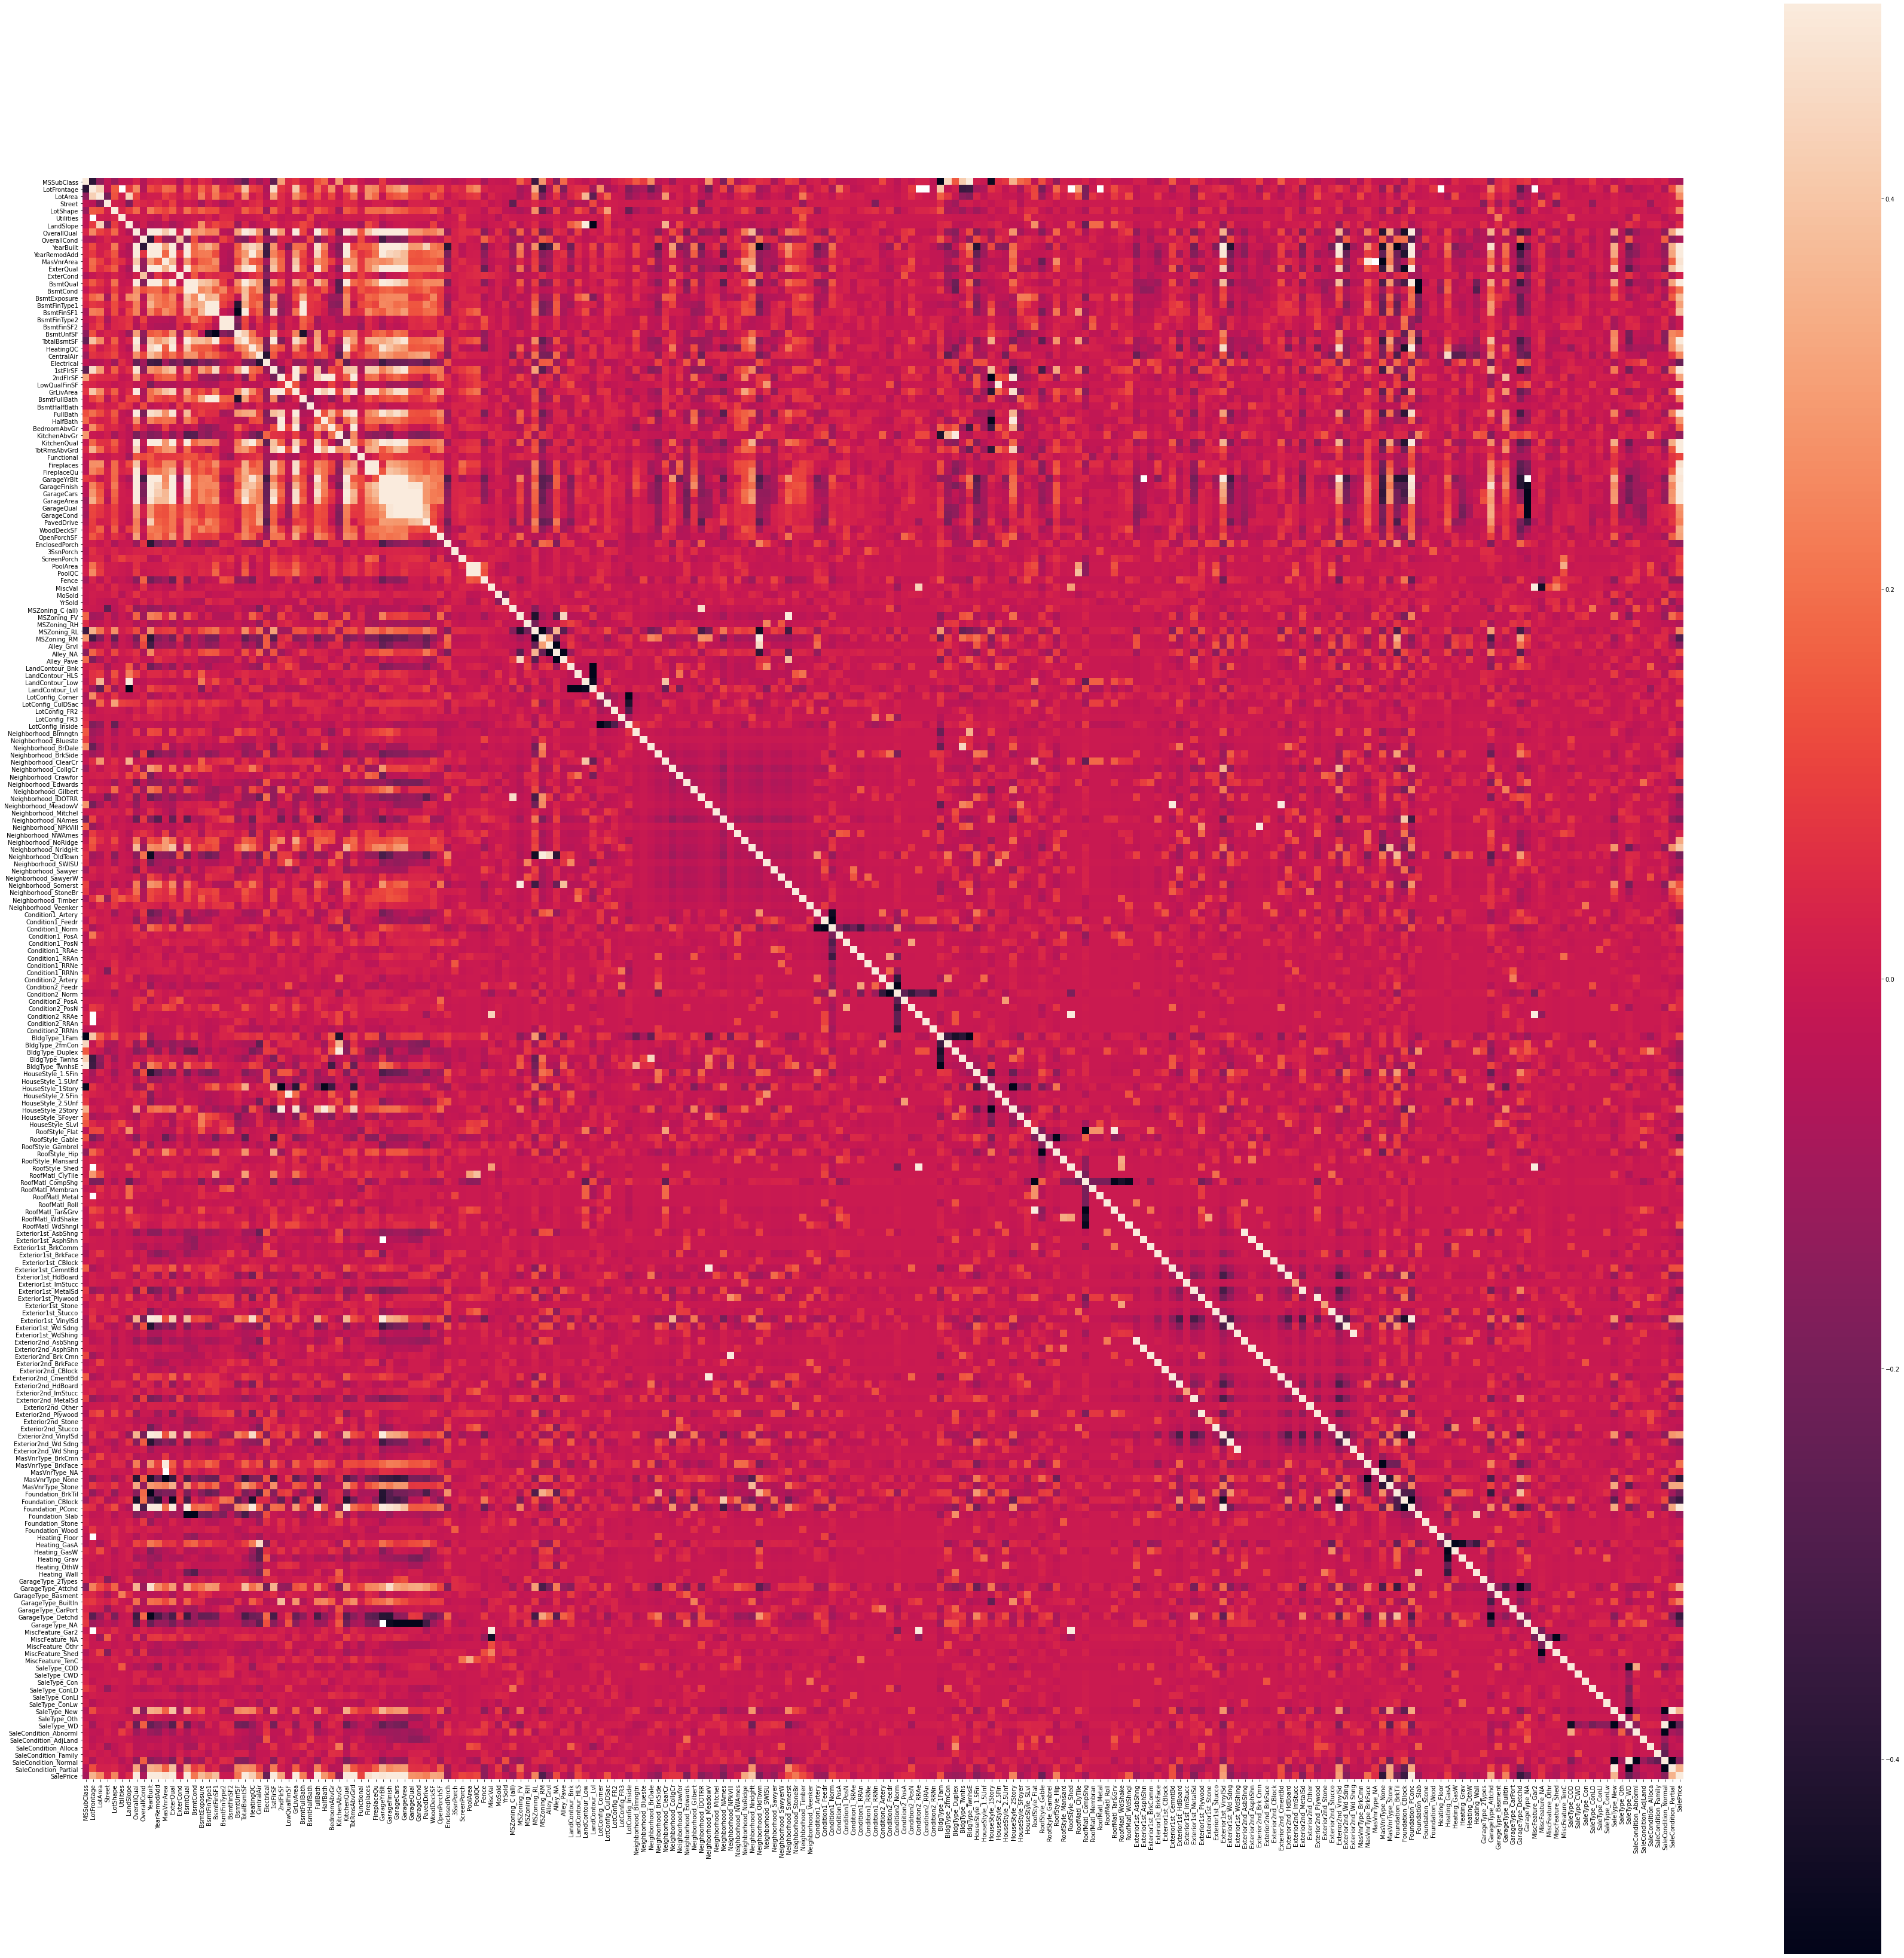

In [564]:
corr = dataset.corr()
plt.figure(figsize=(60,60))
sns.heatmap(corr, vmin=-0.5, vmax=0.5, square = True)

## Extracting Important Features


In [482]:
dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [483]:
dataset = dataset[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                   'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
                   'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                   'GarageArea', 'LotFrontage', 'BsmtFinSF1', '2ndFlrSF',
                   ''
                   'SalePrice']]
dataset                   

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1458,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1

## Removing Anomalies

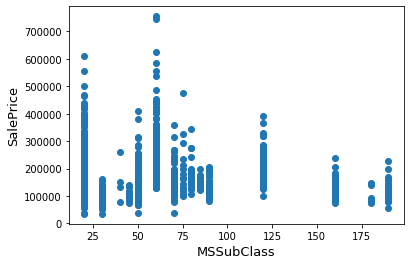

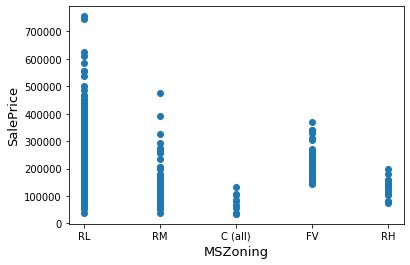

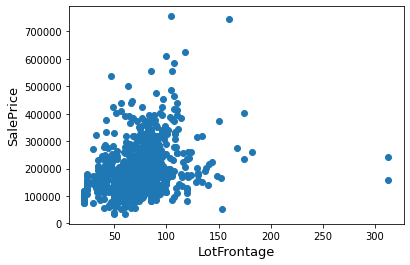

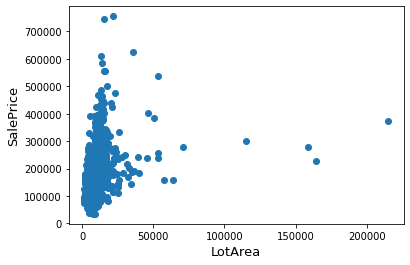

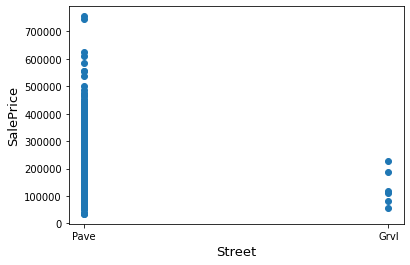

ValueError: ignored

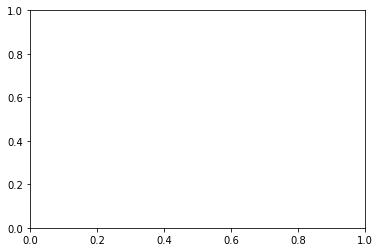

In [484]:
for col in dataset.columns:
  fig, ax = plt.subplots()
  ax.scatter(dataset[col], dataset['SalePrice'])
  plt.ylabel('SalePrice', fontsize=13)
  plt.xlabel(col, fontsize=13)
  plt.show()



## Doing NAs Analysis and Cleaning

In [462]:
# Cleaning Test first
meanTraining = dataset.mean()

# Cleaning MasVnrArea
dataset['MasVnrArea'] = dataset['MasVnrArea'].replace(float('NaN'), meanTraining['MasVnrArea'])

# Cleaning GarageYrBlt
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].replace(float('NaN'), meanTraining['GarageYrBlt'])

dataset.isnull().any()

OverallQual     False
YearBuilt       False
YearRemodAdd    False
MasVnrArea      False
TotalBsmtSF     False
1stFlrSF        False
GrLivArea       False
FullBath        False
TotRmsAbvGrd    False
Fireplaces      False
GarageYrBlt     False
GarageCars      False
GarageArea      False
SalePrice       False
dtype: bool

## Normalizing

In [463]:
toNormalize = ['OverallQual', 'YearRemodAdd', 'MasVnrArea',
               'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 
               'GarageYrBlt', 'GarageArea', 'YearBuilt']

def normalize_dataset(ds, attributes):
  for col in attributes:
    maxi = ds[col].max()
    mini = ds[col].min()
    ds[col] = (ds[col] - mini)/(maxi-mini)

normalize_dataset(dataset, toNormalize)
dataset

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,0.666667,0.949275,0.883333,0.122500,0.140098,0.119780,0.259231,2,8,0,0.936364,2,0.386460,208500
1,0.555556,0.753623,0.433333,0.000000,0.206547,0.212942,0.174830,2,6,1,0.690909,2,0.324401,181500
2,0.666667,0.934783,0.866667,0.101250,0.150573,0.134465,0.273549,2,6,1,0.918182,2,0.428773,223500
3,0.666667,0.311594,0.333333,0.000000,0.123732,0.143873,0.260550,1,7,1,0.890909,3,0.452750,140000
4,0.777778,0.927536,0.833333,0.218750,0.187398,0.186095,0.351168,2,9,1,0.909091,3,0.589563,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.768116,0.633333,0.074375,0.252373,0.399036,0.327619,2,7,2,0.709091,2,0.352609,210000
1456,0.666667,0.500000,0.933333,0.000000,0.188543,0.195961,0.377920,2,9,2,0.372727,1,0.177715,266500
1457,0.444444,0.565217,0.766667,0.000000,0.176432,0.170721,0.140166,1,5,0,0.454545,1,0.169252,142125
1458,0.444444,0.673913,0.250000,0.000000,0.205565,0.211565,0.173700,1,6,0,0.590909,1,0.194640,147500


## Partitioning
Se utilizará como criterio: 75% para entrenamiento y 25% para Test 

In [0]:
# Training
dataTrain = dataset.sample(frac = 0.8)
trainPredictions = dataTrain["SalePrice"]
dataTrain = dataTrain.drop(columns=['SalePrice'])

# Test
dataTest = dataset.drop(dataTrain.index)
testPredictions = dataTest["SalePrice"]
dataTest = dataTest.drop(columns=['SalePrice'])

# Modelo

## Macro Variables
Variables macro que son utilizados como parámetros en el entrenamiento

In [0]:
epochs = 600
inputShape = dataTrain.shape[1]

## Useful Functions

## Callback

In [0]:
# checkpoint
model_path = "/content/drive/My Drive/IO/Version1/Project/Normalized1/"
filepath = model_path + "saved_model.pb"
checkpoint_callback = ModelCheckpoint(filepath, monitor='mae', verbose=1, save_best_only=True, mode='min',save_freq='epoch')

# callbacks
callbacks_list = [checkpoint_callback]

### Model Defintion and Training

In [467]:
# Training
model = Sequential([
      Dense(512, kernel_initializer='normal', activation='relu', input_shape=(inputShape,)),
      Dense(256, kernel_initializer='normal', activation='relu'),
      Dense(128, kernel_initializer='normal', activation='relu'),
      Dense(128, kernel_initializer='normal', activation='linear'),
      Dense(1)
  ])

model.compile(loss='mae', optimizer='adam', metrics=['mae'])


model.fit(dataTrain,
          trainPredictions,
          epochs=epochs,
          #validation_data=validation_split,
          batch_size = 64 ,
          validation_split=0.2,
          callbacks=callbacks_list
        )
# Evaluation
#evaluation = evaluate_model(model, dataTest, testPredictions)
#evaluation

Epoch 1/600
12/15 [=======================>......] - ETA: 0s - loss: 177037.2656 - mae: 177037.2656
Epoch 00001: mae improved from inf to 178300.76562, saving model to /content/drive/My Drive/IO/Version1/Project/Normalized/saved_model.pb
INFO:tensorflow:Assets written to: /content/drive/My Drive/IO/Version1/Project/Normalized/saved_model.pb/assets
15/15 [==============================] - 1s 56ms/step - loss: 178453.6562 - mae: 178300.7656 - val_loss: 189699.2344 - val_mae: 190846.8750
Epoch 2/600
12/15 [=======================>......] - ETA: 0s - loss: 178040.4219 - mae: 178040.4219
Epoch 00002: mae improved from 178300.76562 to 178050.46875, saving model to /content/drive/My Drive/IO/Version1/Project/Normalized/saved_model.pb
INFO:tensorflow:Assets written to: /content/drive/My Drive/IO/Version1/Project/Normalized/saved_model.pb/assets
15/15 [==============================] - 1s 50ms/step - loss: 177860.8125 - mae: 178050.4688 - val_loss: 188920.0938 - val_mae: 190066.3281
Epoch 3/600

## Extract Best Model

In [468]:
model = tf.keras.models.load_model(filepath)

model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fcdb0453a58>>

## Evaluate Model

In [469]:
model.evaluate(dataTest, testPredictions)

10/10 [==============================] - 0s 2ms/step - loss: 19532.1680 - mean_absolute_error: 18716.8750


[19532.16796875, 18716.875]

# Kaggle Predictions

In [470]:
# https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/test.csv
test = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/test.csv')
test = test[['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                   'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
                   'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                   'GarageArea']]
Ids = test['Id']
test = test.drop(columns=['Id'])
test       

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.0,1.0,730.0
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,546.0,546,1092,1,5,0,NaN,0.0,0.0
1455,4,1970,1970,0.0,546.0,546,1092,1,6,0,1970.0,1.0,286.0
1456,5,1960,1996,0.0,1224.0,1224,1224,1,7,1,1960.0,2.0,576.0
1457,5,1992,1992,0.0,912.0,970,970,1,6,0,NaN,0.0,0.0


In [0]:
# Cleaning Test first
meanTest = test.mean()

# Cleaning MasVnrArea
test['MasVnrArea'] = test['MasVnrArea'].replace(float('NaN'), meanTest['MasVnrArea'])

# Cleaning TotalBsmtSF
test['TotalBsmtSF'] = test['TotalBsmtSF'].replace(float('NaN'), meanTest['TotalBsmtSF'])

# Cleaning GarageYrBlt
test['GarageYrBlt'] = test['GarageYrBlt'].replace(float('NaN'), meanTest['GarageYrBlt'])

# Cleaning GarageCars
test['GarageCars'] = test['GarageCars'].replace(float('NaN'), meanTest['GarageCars'])

# Cleaning GarageArea
test['GarageArea'] = test['GarageArea'].replace(float('NaN'), meanTest['GarageArea'])

In [472]:
test.isnull().any()

# Normalizing

normalize_dataset(test, toNormalize)
test

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,0.444444,0.625954,0.183333,0.000000,0.173111,0.104309,0.104309,1,5,0,0.211538,1.0,0.490591
1,0.555556,0.603053,0.133333,0.083721,0.260844,0.196672,0.196672,1,6,0,0.201923,1.0,0.209677
2,0.444444,0.900763,0.800000,0.000000,0.182139,0.111135,0.260666,2,6,1,0.326923,2.0,0.323925
3,0.555556,0.908397,0.800000,0.015504,0.181747,0.110708,0.255333,2,7,1,0.330128,2.0,0.315860
4,0.777778,0.862595,0.700000,0.000000,0.251227,0.186220,0.186220,2,5,0,0.310897,2.0,0.340054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.333333,0.694656,0.333333,0.000000,0.107164,0.029650,0.146118,1,5,0,0.265132,0.0,0.000000
1455,0.333333,0.694656,0.333333,0.000000,0.107164,0.029650,0.146118,1,6,0,0.240385,1.0,0.192204
1456,0.444444,0.618321,0.766667,0.000000,0.240236,0.174275,0.174275,1,7,1,0.208333,2.0,0.387097
1457,0.444444,0.862595,0.700000,0.000000,0.178999,0.120094,0.120094,1,6,0,0.265132,0.0,0.000000


## Predicciones del Modelo

In [0]:
predictions = model.predict(test)

## Submission

In [474]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':Ids,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')
  return my_submission

make_submission(predictions[:,0],'submission_NN')

A submission file has been made


,Id,SalePrice
0,1461,127882.625000
1,1462,150919.890625
2,1463,199221.609375
3,1464,219709.375000
4,1465,230450.375000
...,...,...
1454,2915,106412.312500
1455,2916,114850.117188
1456,2917,175024.593750
1457,2918,140584.437500
